ivancloudvm@gmail.com
# Sales analysis - [YOUTUBE VIDEO](https://www.youtube.com/watch?v=eMOA1pPVUc4&ab_channel=KeithGalli)



In [232]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import datetime
import calendar

Importamos los datos:

In [233]:
os.chdir("C:\\Users\\1v4n\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data")
print(os.getcwd()) #nos da el directorio actual 

C:\Users\1v4n\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data


In [234]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
all_filenames

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

Combinamos estos archivos a uno solo:

In [235]:
#Borramos el archivo que queremos crear para que no se dupliquen los datos cada que corremos este notebook:
remove('C:\Users\1v4n\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\all_data.csv')
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "all_data.csv", index=False, encoding='utf-8-sig')

all_data = pd.read_csv("all_data.csv")

all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


## Pregunta 1: Que mes fue en el que más se vendio? Cuanto se vendio?

Para esto voy a crear una nueva columna "Month" donde se indique el mes de cada fila.

## Limpieza de datos

Usando el metodo .info() podemos ver el total de filas (RangeIndex) y abajo podemos ver que en todas las columnas hay datos faltantes, por lo que procedemos a hacer una limpieza de datos:

In [236]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [237]:
missing = all_data.isnull()
missing

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
186845,False,False,False,False,False,False
186846,False,False,False,False,False,False
186847,False,False,False,False,False,False
186848,False,False,False,False,False,False


Contamos valores faltantes en cada columna:

In [238]:
for column in missing.columns.values.tolist():
    print(column)
    print (missing[column].value_counts())
    print("")   

Order ID
False    186305
True        545
Name: Order ID, dtype: int64

Product
False    186305
True        545
Name: Product, dtype: int64

Quantity Ordered
False    186305
True        545
Name: Quantity Ordered, dtype: int64

Price Each
False    186305
True        545
Name: Price Each, dtype: int64

Order Date
False    186305
True        545
Name: Order Date, dtype: int64

Purchase Address
False    186305
True        545
Name: Purchase Address, dtype: int64



Hay 545 filas con valores NaN, por lo que nos podemos deshacer de ellas usando .dropna():

In [239]:
all_data = all_data.dropna(how = "all")


Comprobemos que no hay más valores NaN:

In [240]:
missing = all_data.isnull()
for column in missing.columns.values.tolist():
    print(column)
    print (missing[column].value_counts())
    print("")  

Order ID
False    186305
Name: Order ID, dtype: int64

Product
False    186305
Name: Product, dtype: int64

Quantity Ordered
False    186305
Name: Quantity Ordered, dtype: int64

Price Each
False    186305
Name: Price Each, dtype: int64

Order Date
False    186305
Name: Order Date, dtype: int64

Purchase Address
False    186305
Name: Purchase Address, dtype: int64



Ahora nuestro dataframe no contiene valores NaN.

In [241]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Si ejecutamos el comando: <code>all_data["DateTime"] =pd.to_datetime(all_data["Order Date"])</code> ocurrirá un error ya que hay datos incorrectos en algunas filas, donde, por ejemplo tenemos "Order Date" en la columna Order Date por lo que primero buscamos las filas que contienen "Order Date":


In [242]:
all_data[all_data["Order Date"] == "Order Date"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Lo que nos da un total de 355 filas que no nos sirven para nuestro analisis, por lo que procedemos a ignorarlas:

In [243]:
all_data = all_data[all_data["Order Date"] != "Order Date"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Procedemos a convertir la columna Order Date a formato de fechas y extraemos el mes en cada dato creando una nueva columna "Month" para poder extrar el mes de cada fila:

In [244]:
all_data['Month'] = pd.DatetimeIndex(pd.to_datetime(all_data["Order Date"])).month

all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


Veamos si la nueva columna Month es de tipo entero:

In [245]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

Ahora debemos crear una nueva columna "Sales" para poder contestar la pregunta 1, ya que hay que tomar en cuenta la cantidad que se vendió y su precio, por lo que hay que multiplicar la cantidad por el precio unitario. Para esto tenemos que cambiar el tipo de dato de las columnas "Quantity Orderred" y "Price Each":

In [246]:
all_data = all_data.astype({"Quantity Ordered": int, "Price Each": float})

all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

Procedemos a crear la columna "Sales":

In [247]:
all_data["Sale"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


Ahora agrupamos el all_data por mes y vemos la suma de ventas en cada mes:

In [248]:
resultados = all_data.groupby("Month").sum()

resultados

,Quantity Ordered,Price Each,Sale
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


Grafiquemos estos resultados:

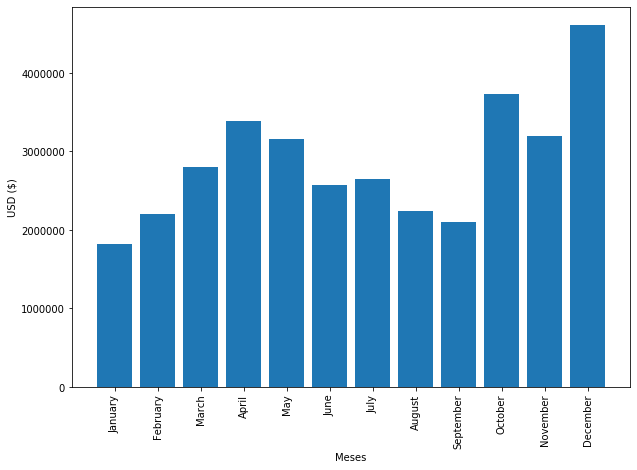

In [249]:
#Primero creamos una lista con los nombres de los meses:
months = []
for month_idx in range(1, 13):
    months.append(calendar.month_name[month_idx])
    
#Creamos la grafica de barras:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
plt.bar(months,resultados["Sale"])
plt.xticks(rotation=90)
plt.ylabel("USD ($)")
plt.xlabel("Meses")
plt.show()

Con estos resultados podemos contestar ahora la pregunta 1:**El mes que más ventas tuvo fue Diciembre con 4.6e+06 USD**

## Pregunta 2: Qué ciudad es la que tuvo más ventas? 

Para contestar esta pregunta primero hay que crear una columna donde se indique la ciudad y el estado para cada una de las ventas. Para esto hay que extraer datos de la columna "Purchase adress", por lo que usaremos el metodo apply() y como argumento una funcion que use split():

In [250]:
def get_city(arg):
    return arg.split(",")[1]



all_data["City"] = all_data["Purchase Address"].apply(lambda x: get_city(x))

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


Podrían existir ciudades de igual nombre pero distinto estado por lo que debemos especificar el estado:

In [251]:
def get_state(arg):
    return arg.split(",")[2].split(" ")[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


Ahora, para saber en que ciudad se realizaron más ventas podemos agrupar el all_data por ciudad y hacer la suma de los datos numericos:

In [252]:
resultados1= all_data.groupby("City").sum()

resultados1

,Quantity Ordered,Price Each,Month,Sale
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


Grafiquemos estos resultados:

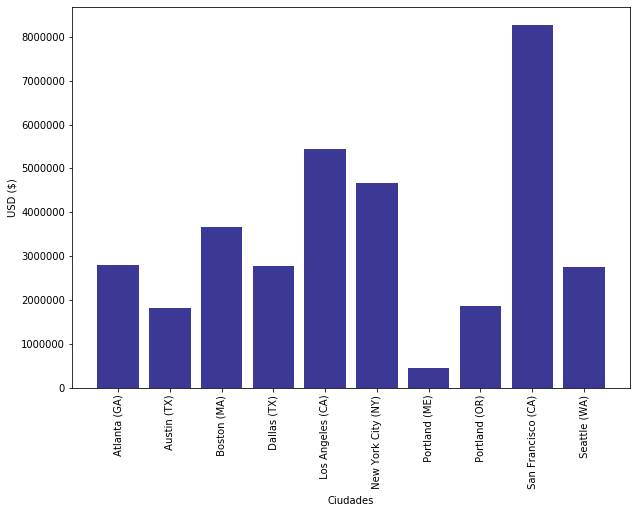

In [253]:
#Primero creamos una lista con los nombres de las ciudades:
cities = [city for city, all_dataa in all_data.groupby("City")]

    
#Creamos la grafica de barras:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)

plt.bar(cities,resultados1["Sale"], color=("#3C3895"))
plt.xticks(rotation=90)
plt.ylabel("USD ($)")
plt.xlabel("Ciudades")
plt.show()

De la grafica anterior podemos ver que la ciudad con más ventas fue **San Francisco (CA)**


## Pregunta 3: A qué hora deberiamos desplegar anuncios de manera que sea más probable que tengamos más ventas?

Para esto es conveniente tener una columna que indique la hora en cada una de las ventas:


In [254]:
#all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

all_data["Hour"] = pd.to_datetime(all_data["Order Date"]).dt.hour

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


Procedemos a graficar las horas en el eje x y el numero de ventas sobre el eje y:

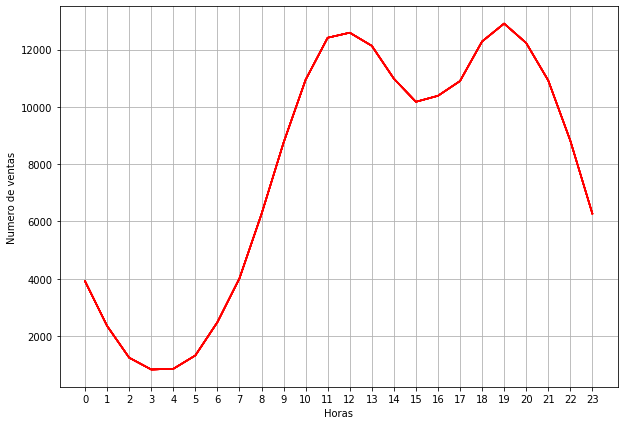

In [255]:
horas = [hora for hora, all_dataa in all_data.groupby("Hour")]

#Creamos la grafica de barras:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)

plt.plot(horas,all_data.groupby(["Hour"]).count(), color=("Red"))
plt.grid()
plt.xticks(horas)
plt.ylabel("Numero de ventas")
plt.xlabel("Horas")
plt.show()
         


Por lo que las horas más conventiendes de mostrar anuncios es alrededor de las **12:00 hrs y a las 19:00 hrs**

## Pregunta 4 : Qué productos son los que más se venden juntos?

Para contestar esta pregunta hay que tener en cuenta que productos con el mismo ID significa que fueron comprados juntos. Por lo que basta encontrar ID duplicadas. Con el nuevo df creamos una nueva columna "Grouped" la cual contendra los productos comprados por cada ID:

In [263]:
df = all_data[all_data["Order ID"].duplicated(keep=False)]

df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

df.head()

C:\Users\1v4n\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hour,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


Ahora creamos un dataframe que solo contenga el Order ID y los objetos comprados "Grouped" por lo que hay que desechar filas que tengan Order ID duplicados:

In [265]:
df1 = df[["Order ID","Grouped"]].drop_duplicates()

df1.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


Para saber que productos se venden juntos vamos a usar las librerias "itertools" y "collections":

In [271]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df1["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))
    #cambiando el 2 podemos encontrar los productos vendidos en trio o más.
    
for key , value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Con lo que comprobamos que los objetos mas vendidos en par son el **iPhone y Lightning Charging Cable con un total de 1005 ventas en par**

## Pregunta 5: Que producto se vendio más? Por qué?

Para responder esto podemos agrupar el dataframe por Product y aplicar suma para obtener el total de ventas de cada producto:

In [277]:
product_group = all_data.groupby("Product")

quantity_ordered =product_group.sum()["Quantity Ordered"]

quantity_orderedity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

Graficamos estos resultados:

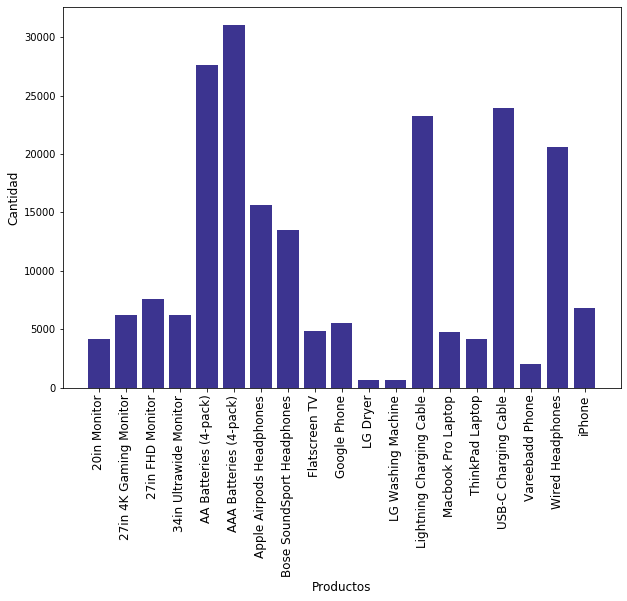

In [285]:
#Primero creamos una lista con los nombres de los productos:
products = [prod for prod, all_data in product_group]

    
#Creamos la grafica de barras:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)

plt.bar(products,quantity_ordered, color=("#3C3490"))
plt.xticks(rotation=90,size = 12)
plt.ylabel("Cantidad",size = 12)
plt.xlabel("Productos",size = 12)
plt.show()

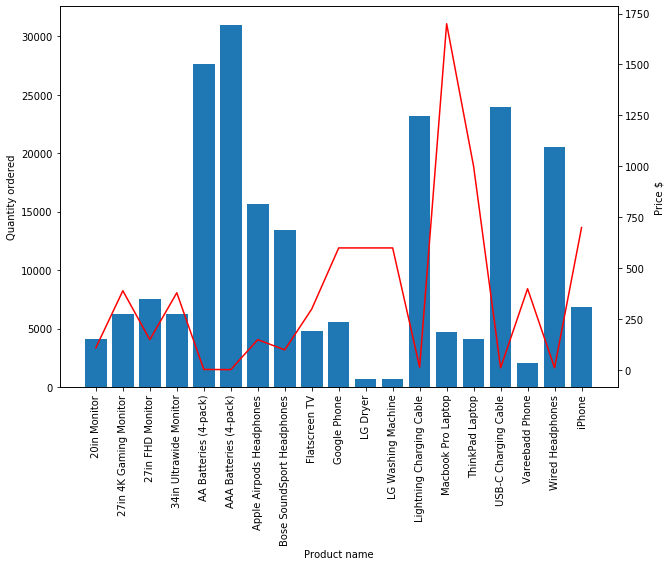

In [295]:
prices = all_data.groupby("Product").mean()["Price Each"]

fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)

ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered)
ax2.plot(products,prices,"r-")

ax1.set_xlabel("Product name")
ax1.set_xticklabels(products,rotation = "vertical")
ax1.set_ylabel("Quantity ordered" )
ax2.set_ylabel("Price $")

plt.show()

De las graficas anteriores podemos observar que el producto que mas se vendio fueron las **pilas AAA** y se nota una correlacion entre el numero de ventas y el precio del producto ya que a menor precio mayor la cantidad de ventas.